# 4.微积分

In [36]:
import torch

在2500年前，古希腊人把一个多边形分成三角形，并把它们的面积相加，才找到计算多边形面积的方法。 为了求出曲线形状（比如圆）的面积，古希腊人在这样的形状上刻内接多边形。 如 图2.4.1所示，内接多边形的等长边越多，就越接近圆。 这个过程也被称为逼近法（method of exhaustion）。



                                    图2.4.1 用逼近法求圆的面积

事实上，逼近法就是积分（integral calculus）的起源。 2000多年后，微积分的另一支，微分（differential calculus）被发明出来。 在微分学最重要的应用是优化问题，即考虑如何把事情做到最好。 正如在 2.3.10.1节中讨论的那样， 这种问题在深度学习中是无处不在的。

在深度学习中，我们“训练”模型，不断更新它们，使它们在看到越来越多的数据时变得越来越好。 通常情况下，变得更好意味着最小化一个损失函数（loss function）， 即一个衡量“模型有多糟糕”这个问题的分数。 最终，我们真正关心的是生成一个模型，它能够在从未见过的数据上表现良好。 但“训练”模型只能将模型与我们实际能看到的数据相拟合。 因此，我们可以将拟合模型的任务分解为两个关键问题：

优化（optimization）：用模型拟合观测数据的过程；

泛化（generalization）：数学原理和实践者的智慧，能够指导我们生成出有效性超出用于训练的数据集本身的模型。

## 1.导数和微分
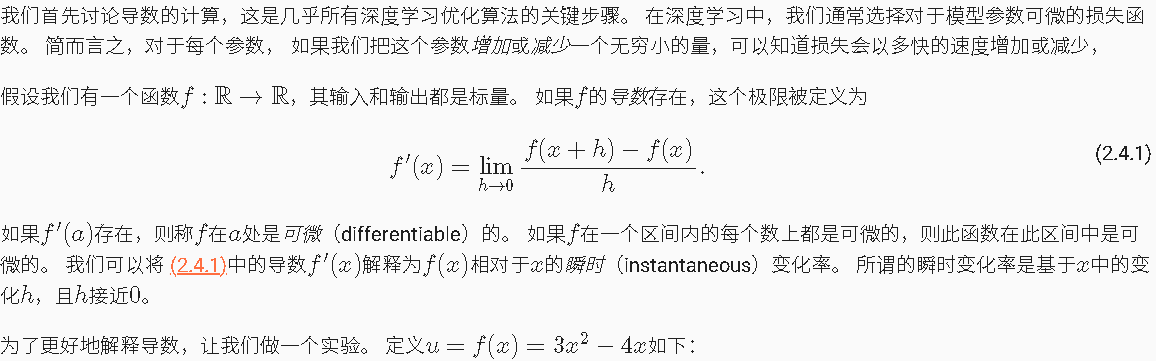

In [37]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l
def f(x):
    return 3*x**2-4*x

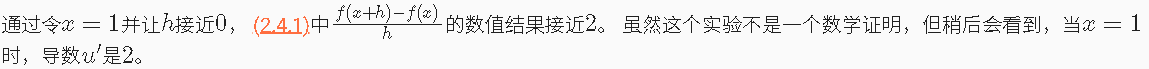

In [38]:
def numerical_lim(f,x,h):
    return (f(x+h)-f(x))/h
h=0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


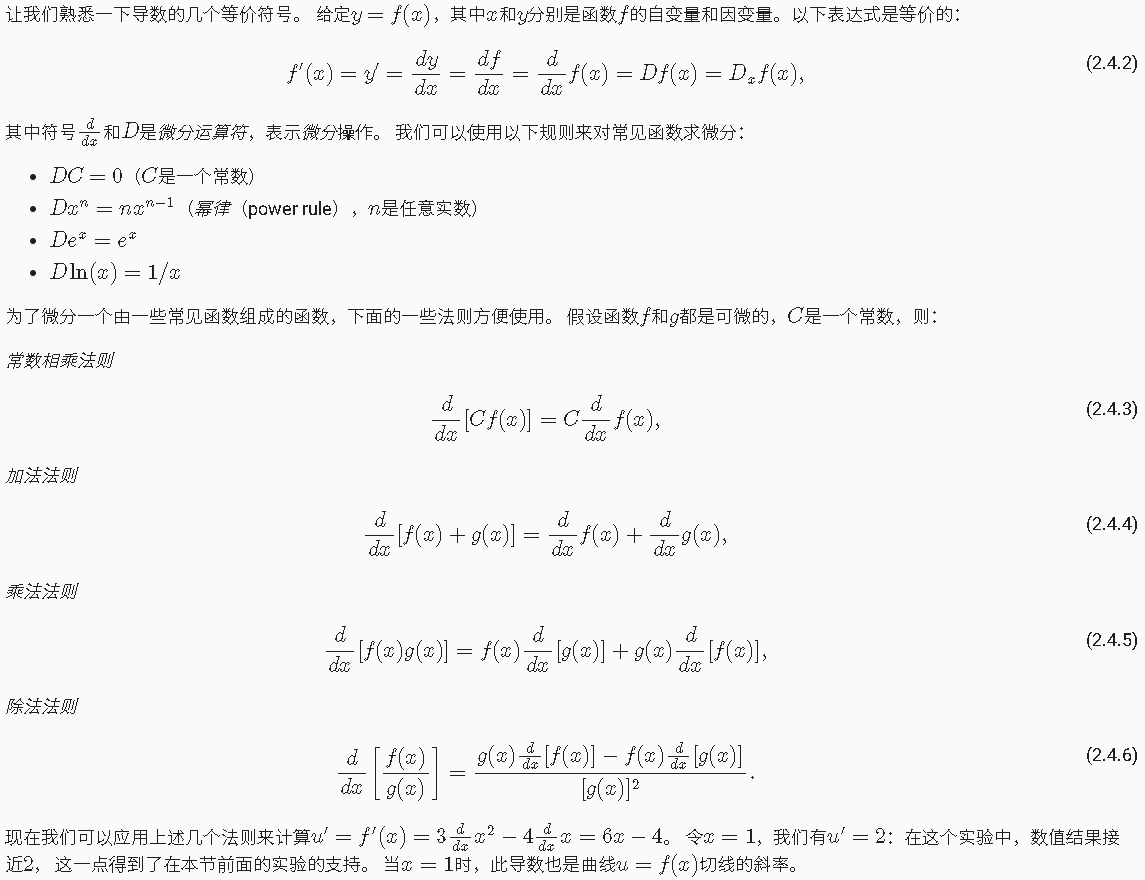

为了对导数的这种解释进行可视化，我们将使用matplotlib， 这是一个Python中流行的绘图库。 要配置matplotlib生成图形的属性，我们需要定义几个函数。 在下面，use_svg_display函数指定matplotlib软件包输出svg图表以获得更清晰的图像。

注意，注释#@save是一个特殊的标记，会将对应的函数、类或语句保存在d2l包中。 因此，以后无须重新定义就可以直接调用它们（例如，d2l.use_svg_display()）。

In [39]:
def use_svg_display(): #@save
    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')

我们定义set_figsize函数来设置图表大小。 注意，这里可以直接使用d2l.plt，因为导入语句 from matplotlib import pyplot as plt已标记为保存到d2l包中。

In [40]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

下面的set_axes函数用于设置由matplotlib生成图表的轴的属性。

In [41]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

通过这三个用于图形配置的函数，定义一个plot函数来简洁地绘制多条曲线， 因为我们需要在整个书中可视化许多曲线。

In [48]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(10.5, 5.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

In [49]:
# 绘制函数u=f(x)及其在x=1处的切线y=2x-3,其中系数2是切线斜率
x=np.arange(0,3,0.1)
print(x)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9]


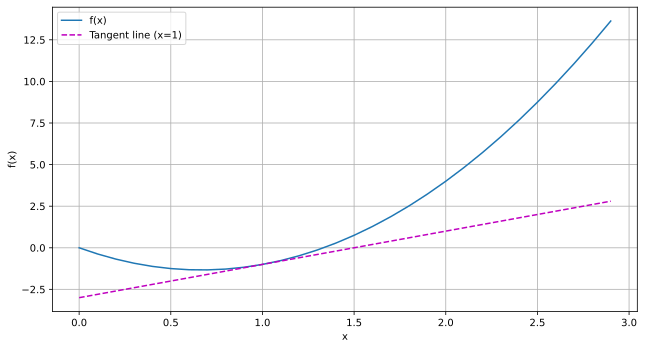

In [50]:
plot(x,[f(x),2*x-3],'x','f(x)',legend=['f(x)','Tangent line (x=1)'])

## 2.偏导数
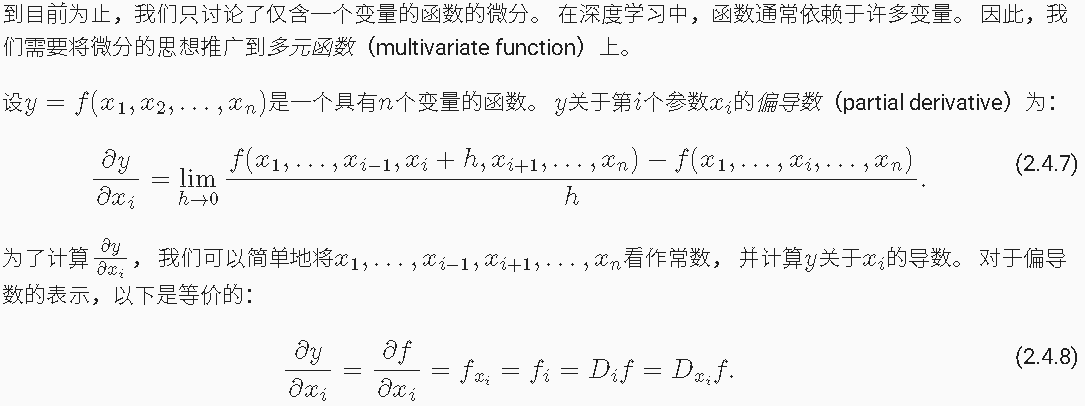
### 偏导数计算规则详解

#### 1. 基本计算规则

##### 1.1 单变量函数求导规则在偏导中的应用

1. 幂函数规则：
   - ∂(x^n)/∂x = nx^(n-1)
   - 对其他变量求导为0

2. 加减法规则：
   - ∂(u ± v)/∂x = ∂u/∂x ± ∂v/∂x

3. 乘法规则：
   - ∂(uv)/∂x = u∂v/∂x + v∂u/∂x

4. 除法规则：
   - ∂(u/v)/∂x = (v∂u/∂x - u∂v/∂x)/v²

5. 链式法则：
   - ∂z/∂x = ∂z/∂u · ∂u/∂x

### 2. 具体计算例子

#### 例1：简单多项式函数
f(x,y) = x² + 2xy + y²

求偏导数：
```
∂f/∂x = 2x + 2y  (对x求导，y看作常数)
∂f/∂y = 2x + 2y  (对y求导，x看作常数)
```

#### 例2：指数函数
f(x,y) = e^(x+y)

求偏导数：
```
∂f/∂x = e^(x+y)  (对x求导，y看作常数)
∂f/∂y = e^(x+y)  (对y求导，x看作常数)
```

#### 例3：复合函数
f(x,y) = sin(x²y)

求偏导数：
```
∂f/∂x = 2xy·cos(x²y)  (链式法则)
∂f/∂y = x²·cos(x²y)   (链式法则)
```

#### 例4：分式函数
f(x,y) = (x + y)/(x - y)

求偏导数：
```
∂f/∂x = [(x-y) - (x+y)]/(x-y)² = -2y/(x-y)²
∂f/∂y = [(x-y) + (x+y)]/(x-y)² = 2x/(x-y)²
```

### 3. 高阶偏导数例子

#### 例5：混合偏导数
f(x,y) = x²y + xy²

一阶偏导：
```
∂f/∂x = 2xy + y²
∂f/∂y = x² + 2xy
```

二阶偏导：
```
∂²f/∂x² = 2y
∂²f/∂y² = 2x
∂²f/∂x∂y = 2x + 2y
∂²f/∂y∂x = 2x + 2y
```

### 4. 应用场景示例

#### 4.1 优化问题
找到函数f(x,y) = x² + y² - 2x - 4y的最小值

步骤：
1. 求偏导数：
   ```
   ∂f/∂x = 2x - 2
   ∂f/∂y = 2y - 4
   ```

2. 令偏导数为0：
   ```
   2x - 2 = 0  →  x = 1
   2y - 4 = 0  →  y = 2
   ```

3. 验证二阶导数：
   ```
   ∂²f/∂x² = 2 > 0
   ∂²f/∂y² = 2 > 0
   ```
   确认是最小值点(1,2)

#### 4.2 热传导方程
u(x,y,t)表示温度分布，热方程：
∂u/∂t = α(∂²u/∂x² + ∂²u/∂y²)

### 5. 计算技巧

1. 看作常数法：
   - 求∂f/∂x时，将y看作常数
   - 求∂f/∂y时，将x看作常数

2. 分步计算法：
   - 复杂函数先化简
   - 使用链式法则逐步求导

3. 检验方法：
   - 对于混合偏导数，一般有∂²f/∂x∂y = ∂²f/∂y∂x

## 3.梯度
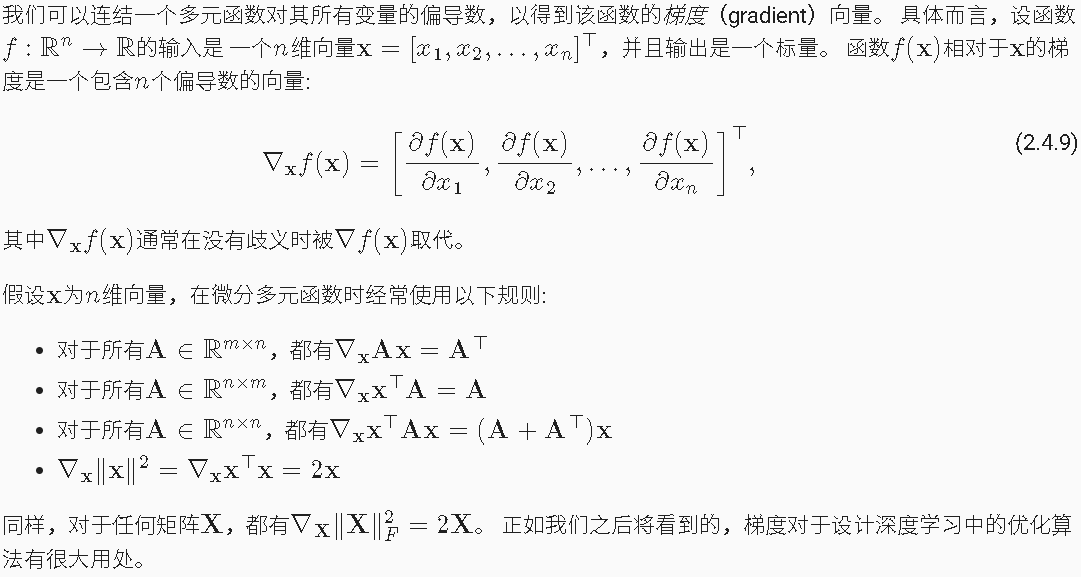

## 4.链式法则
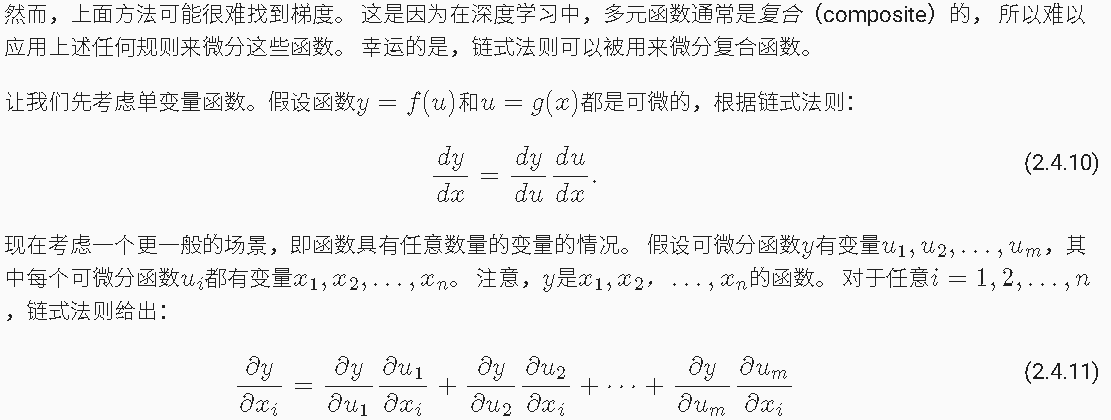

深度学习中的梯度是优化算法的核心概念之一，主要用于训练神经网络。简单来说，梯度是一个多维空间中某点的方向导数，它告诉我们在当前点如何变化能够使目标函数（通常是损失函数）取得最小值。通过计算梯度并沿着梯度的方向调整参数，我们可以逐步优化神经网络的性能。下面是对深度学习中梯度的详细解释：

#### 1. **梯度的基本概念**

在深度学习中，我们通常使用反向传播（Backpropagation）算法来计算神经网络中的梯度。梯度是损失函数相对于网络中每个参数（权重和偏置）的导数。简单地说，梯度描述了损失函数对每个参数的变化率，即如果调整某个参数，损失函数的值如何变化。

##### 数学定义

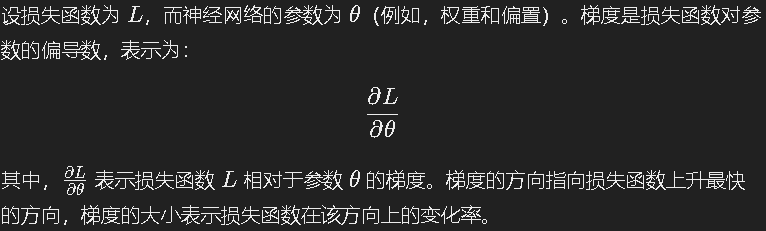

#### 2. **梯度在神经网络中的应用**

神经网络通常由多个层（如输入层、隐藏层、输出层）组成，每一层都有许多参数（权重和偏置）。为了训练神经网络，我们需要最小化损失函数 \( L \)，从而使网络的输出尽可能接近真实标签。

##### 反向传播算法

反向传播是计算神经网络梯度的常用算法。该算法通过链式法则（Chain Rule）将梯度从输出层传播回输入层，逐层计算每个参数的梯度。

- **正向传播**：输入数据通过神经网络传播，计算得到预测输出。
- **计算损失**：通过与实际标签比较，计算损失函数值。
- **反向传播**：从输出层开始，计算每一层参数的梯度，并将梯度传递到上一层。

反向传播的步骤涉及：
1. 计算损失函数相对于输出层的梯度。
2. 使用链式法则逐层计算梯度，直到输入层。
3. 更新网络参数（通常使用梯度下降法）。

##### 梯度下降法

梯度下降法是通过调整网络参数来最小化损失函数的常用优化方法。基本思想是沿着损失函数梯度的反方向调整参数，逐步接近最小值。

1. **批量梯度下降（Batch Gradient Descent）**：每次迭代使用所有训练数据来计算梯度，并更新参数。
2. **随机梯度下降（SGD）**：每次迭代只使用一个样本来计算梯度，更新参数。由于其噪声性，收敛速度较慢，但能跳出局部最小值。
3. **小批量梯度下降（Mini-batch Gradient Descent）**：每次迭代使用一小部分样本来计算梯度，是批量梯度下降和随机梯度下降的折中方法。

##### 3. **梯度的计算与优化**

在深度学习中，计算梯度的关键点是通过链式法则将误差反向传播，并计算每个参数的梯度。链式法则在这里的作用是将输出层的误差通过每一层反向传递到输入层，计算每层对损失函数的贡献。

例如，对于一个多层感知机（MLP），假设损失函数 \( L \) 依赖于输出层的激活值 \( a^{(L)} \)，而输出层的激活值又依赖于上一层的激活值 \( a^{(L-1)} \)，以此类推。我们通过链式法则可以得到每一层的梯度，最终得到对参数的更新公式。

#### 4. **梯度爆炸与梯度消失**

在训练深度神经网络时，有时会遇到**梯度爆炸**或**梯度消失**的问题。这两种现象都会导致网络训练困难，甚至无法收敛。

- **梯度爆炸**：当网络中的梯度非常大时，参数更新过于剧烈，导致训练不稳定，权重值变得极大，无法收敛。这通常出现在深度网络的前几层。
  
- **梯度消失**：当梯度非常小时，参数更新会变得极其缓慢，导致训练无法有效进行。梯度消失常见于深度神经网络的反向传播过程中，特别是当激活函数为饱和函数（如sigmoid）时。

**解决方法**：
- 对于梯度爆炸，可以使用梯度裁剪（Gradient Clipping），即设定梯度的最大值，如果梯度超过这个值就进行裁剪。
- 对于梯度消失，可以使用更合适的激活函数（如ReLU），并采用合适的初始化方法（如Xavier初始化或He初始化）来缓解该问题。

#### 5. **如何理解梯度的意义**

从直觉上讲，梯度可以看作是“指引”你前进的方向。假设你站在一个山谷的底部，想要找到山谷的最低点（即损失函数的最小值）。你可以根据当前站的位置计算出山的坡度（即梯度），然后朝着坡度最陡的方向走。每次走一步，计算新的坡度并继续前进，直到你到达山谷的底部（即损失最小的点）。

#### 6. **总结**

- **梯度**是损失函数相对于网络参数的偏导数，表示损失函数对每个参数的变化率。
- 通过**反向传播**计算梯度，利用**梯度下降**来更新参数，优化网络性能。
- 在训练过程中需要处理好梯度爆炸和梯度消失的问题，可以通过选择合适的激活函数和初始化方法来缓解这些问题。
- 梯度是深度学习中优化过程的核心，决定了网络参数如何调整，从而使模型在训练数据上表现更好。

## 5.小结
微分和积分是微积分的两个分支，前者可以应用于深度学习中的优化问题。

导数可以被解释为函数相对于其变量的瞬时变化率，它也是函数曲线的切线的斜率。

梯度是一个向量，其分量是多变量函数相对于其所有变量的偏导数。

链式法则可以用来微分复合函数。

## 6.练习
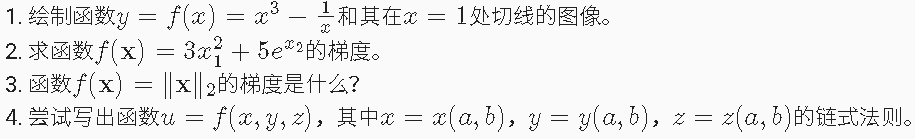

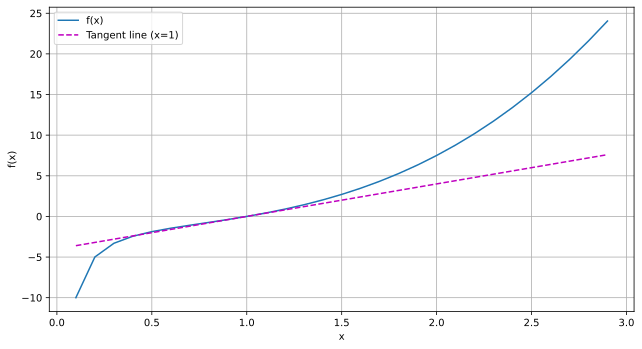

In [61]:
#1
def f(x):
    return x**3-1/x
x=np.arange(0.1,3,0.1)
plot(x,[f(x),4*x-4],'x','f(x)',legend=['f(x)','Tangent line (x=1)'])

2
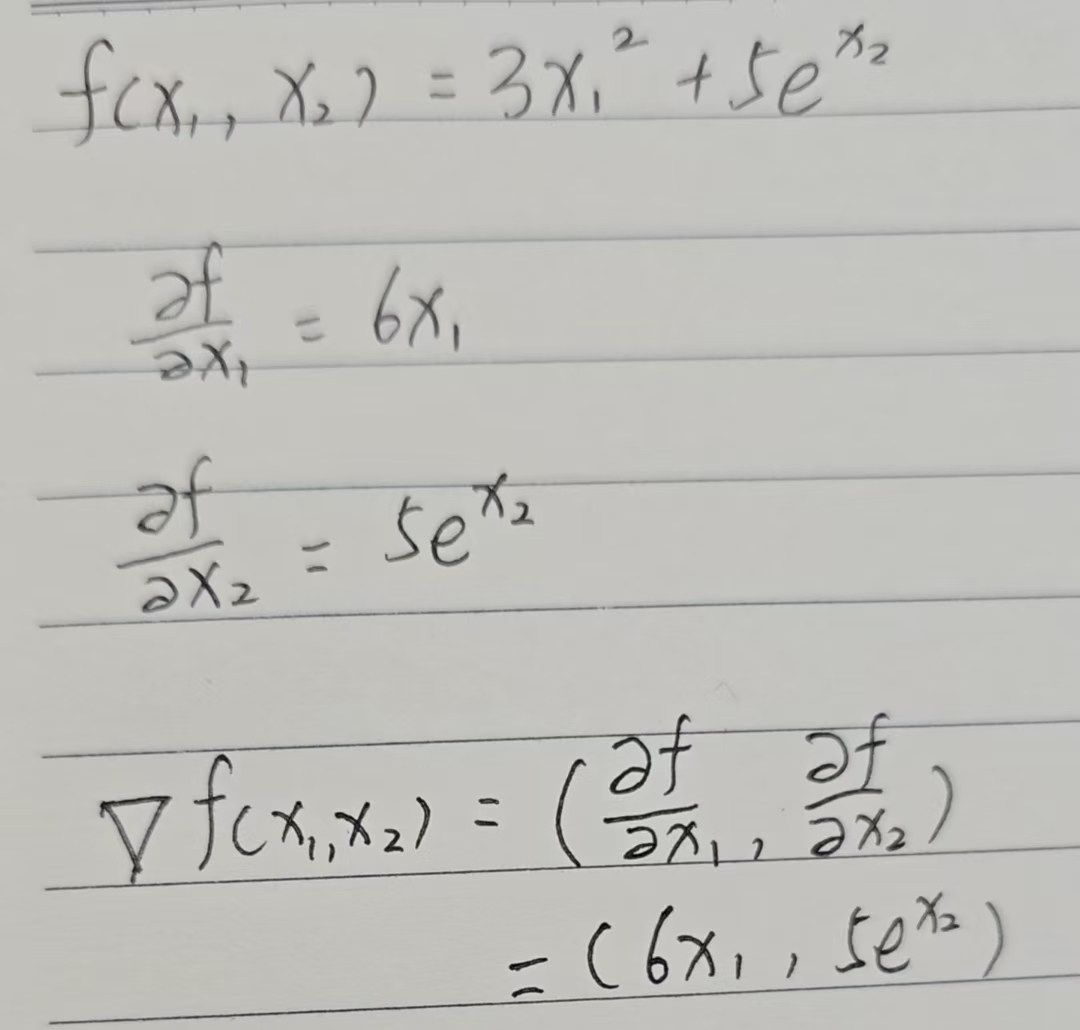

3.

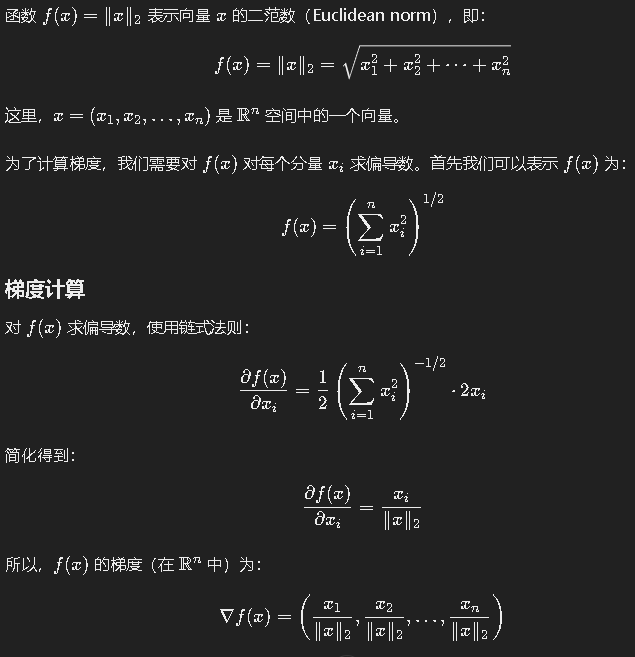

4.

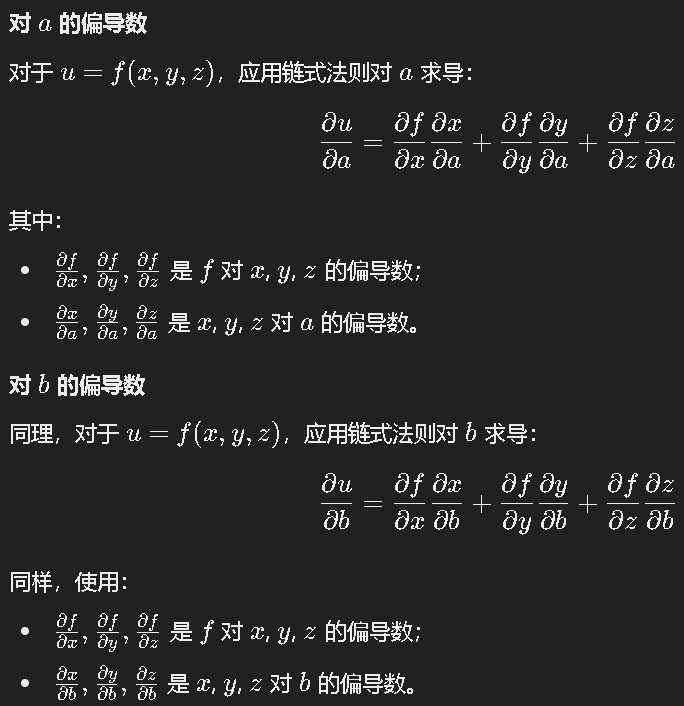